In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import minimize

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
full_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
X = full_data['GrLivArea']
y = full_data['SalePrice']

In [4]:
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X] 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
learning_rate = 0.01
iterations = 10000
m = y_train.shape[0]
theta = np.zeros(2)

In [7]:
def predict(X, theta):
    return np.dot(X, theta)

In [8]:
def gradient_descent(X, y, theta, iterations, learning_rate):
    losses = []
    thetas = [theta]
    for i in range(iterations):
        y_pred = predict(X, theta)
        error = y_pred - y
        loss = 1/(2*m) * np.dot(error.T, error)
        losses.append(loss)
        theta = theta - (learning_rate * (1/m) * np.dot(X.T, error))
        thetas.append(theta)
        
    return thetas, losses

In [9]:
thetas, losses = gradient_descent(X_train, y_train, theta, iterations, learning_rate)
theta = thetas[-1]

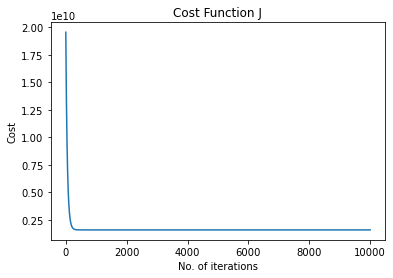

In [10]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(losses)
plt.show()

In [11]:
Y_pred = theta[0] + theta[1] * X_test

In [12]:
X_test_draw = np.delete(X_test, 0, 1) 

In [13]:
Y_pred_draw = np.delete(Y_pred, 0, 1)

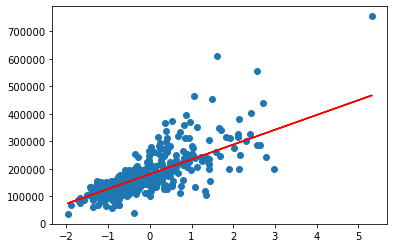

In [14]:
plt.scatter(X_test_draw, y_test)
plt.plot(X_test_draw, Y_pred_draw, color='red')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

reg_pred = reg_model.predict(X_test)

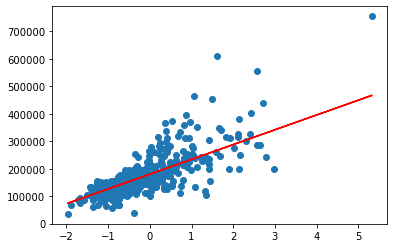

In [16]:
plt.scatter(X_test_draw, y_test)
plt.plot(X_test_draw, reg_pred, color='red')
plt.show()

In [17]:
reg_model.coef_

array([    0.        , 53844.68407667])

In [18]:
theta

array([180098.42294697,  53844.68407667])

In [19]:
import math
from sklearn.metrics import mean_squared_error

def root_mean_squared_log_error(y_valid, y_preds):
    """Calculate root mean squared error of log(y_true) and log(y_pred)"""
    if len(y_preds)!=len(y_valid): return 'error_mismatch'
    y_preds_new = [math.log(x) for x in y_preds]
    y_valid_new = [math.log(x) for x in y_valid]
    return mean_squared_error(y_valid_new, y_preds_new, squared=False)

In [20]:
root_mean_squared_log_error(y_test, Y_pred_draw)

0.2748269606496895

In [21]:
root_mean_squared_log_error(y_test, reg_pred)

0.27482696064969087